In [ ]:
"""
The Problem statement is Using the Weather data can we find any relationship between Temperature and humidity , also Apparent
Temperature and Humidity . Also can we predict the humidity given the Apparent Temperature and Temperature
"""

In [41]:
# IMPORT ALL THE NESSASARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# READING WEATHER HISTORY CSV FILE

In [42]:
weather_data = pd.read_csv("D:\PROGRAMS\jupyter_programs\datasets\weatherHistory.csv")

In [ ]:
# MAKING A DEEP COPY OF THE DATAFRAME SO THAT THE CHANGES WILL NOT AFFECT ORIGINIAL DATASET

In [43]:
weatherdt = weather_data.copy()

In [ ]:
# SOME DATA VISUALIZATION IS DONE HERE

In [44]:
weatherdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [45]:
weatherdt.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,10.855,0.735,10.811,187.509,10.347,0.000,1003.236
std,9.552,10.697,0.195,6.914,107.383,4.192,0.000,116.970
min,-21.822,-27.717,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.689,2.311,0.600,5.828,116.000,8.340,0.000,1011.900
50%,12.000,12.000,0.780,9.966,180.000,10.046,0.000,1016.450
75%,18.839,18.839,0.890,14.136,290.000,14.812,0.000,1021.090
max,39.906,39.344,1.000,63.853,359.000,16.100,0.000,1046.380


In [46]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [47]:
weatherdt.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,10.855,0.735,10.811,187.509,10.347,0.000,1003.236
std,9.552,10.697,0.195,6.914,107.383,4.192,0.000,116.970
min,-21.822,-27.717,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.689,2.311,0.600,5.828,116.000,8.340,0.000,1011.900
50%,12.000,12.000,0.780,9.966,180.000,10.046,0.000,1016.450
75%,18.839,18.839,0.890,14.136,290.000,14.812,0.000,1021.090
max,39.906,39.344,1.000,63.853,359.000,16.100,0.000,1046.380


In [ ]:
# CHECKING FOR MISSING VALUES IN THE DATA

In [48]:
weatherdt.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
## MISSING VALUES ARE ONLY PRESENT IN PRECIP TYPE COL AND NO OTHER COL 

In [ ]:
# DROPPING ALL THE UNNECESSARY COLUMNS FROM THE DATASET

In [49]:
col=['Formatted Date','Summary','Precip Type','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)','Wind Speed (km/h)','Daily Summary']

weatherdt = weatherdt.drop(columns=col,axis=1)

In [50]:
weatherdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Humidity                  96453 non-null  float64
dtypes: float64(3)
memory usage: 2.2 MB


In [ ]:
# CHANGING THE COL NAMES FOR EASIER USE IN THE FUTURE

In [51]:
weatherdt.columns = ['Temp','Apparent_temp','Humidity']

In [52]:
weatherdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp           96453 non-null  float64
 1   Apparent_temp  96453 non-null  float64
 2   Humidity       96453 non-null  float64
dtypes: float64(3)
memory usage: 2.2 MB


In [ ]:
## PLOTTING EACH OF THREE COLUMNS IN HISTOGRAM TO VISUALIZE THE DATA MORE

<AxesSubplot:xlabel='Temp', ylabel='Count'>

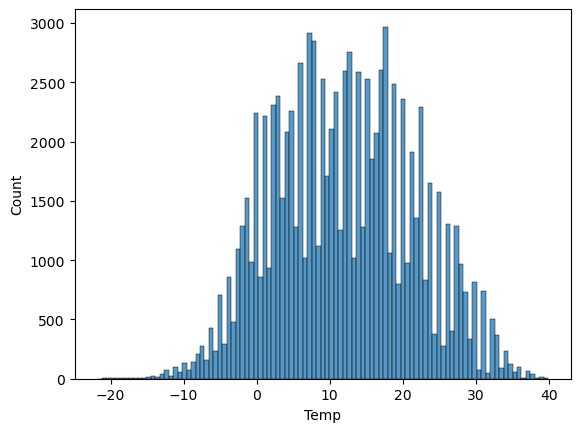

In [53]:
sns.histplot(weatherdt['Temp'])

<AxesSubplot:xlabel='Apparent_temp', ylabel='Count'>

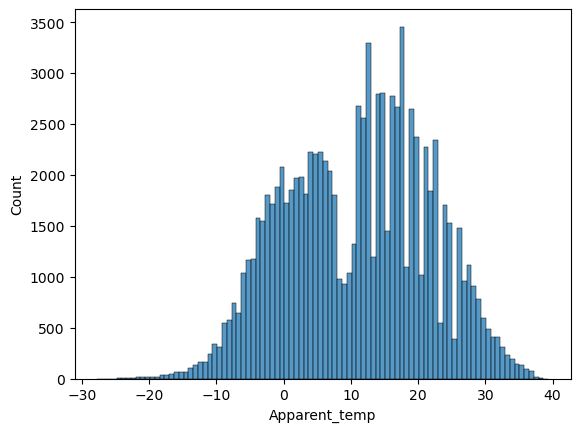

In [54]:
sns.histplot(weatherdt['Apparent_temp'])

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

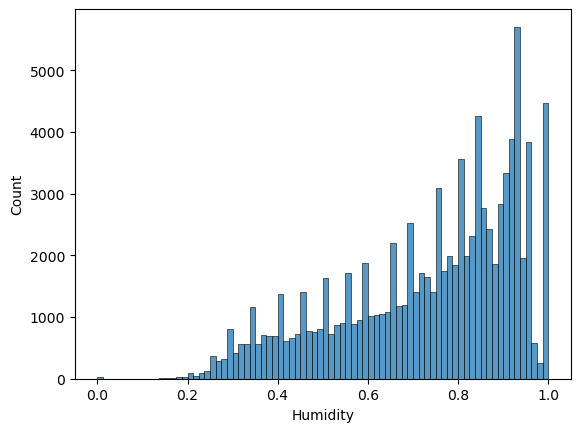

In [55]:
sns.histplot(weatherdt['Humidity'])

In [ ]:
## PLOTTING A SCATTER-PLOT OF TEMP VS HUMIDITY AND APPARENT_TEMP VS HUMIDITY

<AxesSubplot:xlabel='Temp', ylabel='Humidity'>

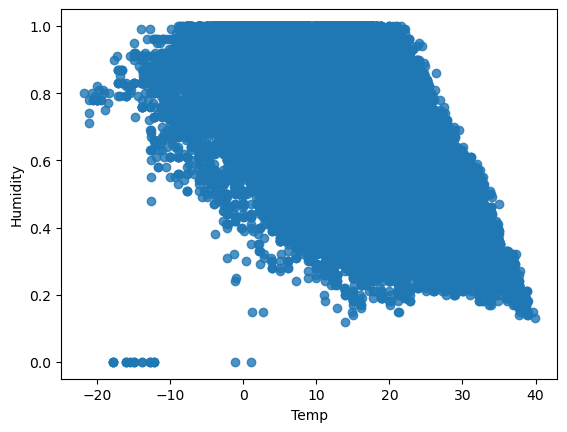

In [56]:
sns.regplot(x='Temp',y='Humidity', scatter=True,fit_reg=False, data=weatherdt)

<AxesSubplot:xlabel='Apparent_temp', ylabel='Humidity'>

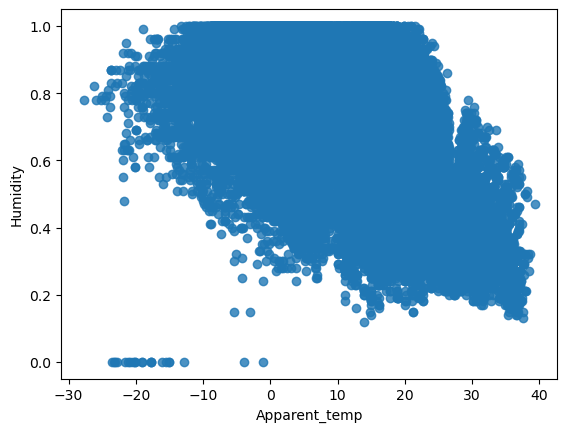

In [57]:
sns.regplot(x='Apparent_temp',y='Humidity', scatter=True,fit_reg=False, data=weatherdt)

In [ ]:
""" 
From the Above two Scatter plots Humidity seems to have a negative correlation with both Temp and Apparent_temp
This is proven futher below with the help of correlation matrix    
"""

In [58]:
# FINDING THE CORRELATION MATRIX OF THE DATA
corr_matrix = weatherdt.corr()
print(corr_matrix)

                Temp  Apparent_temp  Humidity
Temp           1.000          0.993    -0.632
Apparent_temp  0.993          1.000    -0.603
Humidity      -0.632         -0.603     1.000


In [ ]:
# THE TRAIN-TEST SPLITTING OF THE DATA IS DONE BELOW

In [59]:
x1 = weatherdt.drop(['Humidity'], axis = 'columns', inplace=False)
y1 = weatherdt['Humidity']

array([[<AxesSubplot:title={'center':'Humidity'}>]], dtype=object)

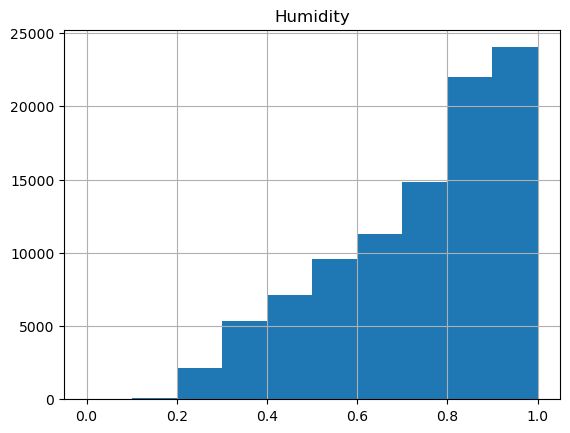

In [69]:
# VISUALIZING Y1 DATAFRAME
humid = pd.DataFrame(y1)
humid.hist()

In [72]:
# TRAIN-TEST SPLITTING 
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 28936, random_state = 3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(67517, 2) (28936, 2) (67517,) (28936,)


In [ ]:
# HERE I HAVE CREATED A BASE MODEL BY USING THE TEST DATA MEAN VALUE WHICH I WILL BE USING AS A BENCHMARK TO COMPARE WITH 
# PREDICTED VALUES

In [73]:
# BASE MODEL
base_pred = np.mean(y_test)
print(base_pred)

0.7340268178048


In [74]:
base_pred = np.repeat(base_pred, len(y_test))

In [75]:
# FINDING RMSE OF BASE MODEL
RMSE_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(RMSE_error)

0.19592792581621832


In [76]:
# LINEAR REGRESSION MODEL

In [77]:
lgr = LinearRegression(fit_intercept=True)

# MODEL

model_lin1=lgr.fit(x_train, y_train)

# PREDICTING THE MODEL ON TEST SET
weather_pred_1 = lgr.predict(x_test)


In [78]:
# COMPUTING MSE AND RMSE
lin_mse1 = mean_squared_error(y_test, weather_pred_1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.14569074673879795


In [79]:
# R squared value
r2_lin_test1=model_lin1.score(x_test,y_test)
r2_lin_train1=model_lin1.score(x_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.4470685956833981 0.44033708836567076


count   28936.000
mean       -0.001
std         0.146
min        -1.255
25%        -0.095
50%         0.009
75%         0.103
max         0.388
Name: Humidity, dtype: float64

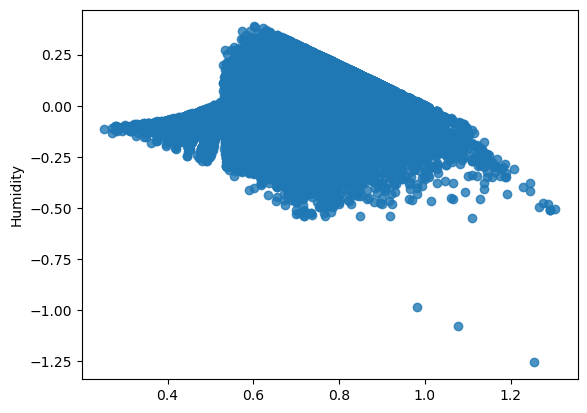

In [80]:
# Regression diagnostics- Residual plot analysis
residuals1=y_test-weather_pred_1
sns.regplot(x=weather_pred_1, y=residuals1, scatter=True, fit_reg=False)
residuals1.describe()

In [ ]:
"""
The Linear Regression Model has an RMSE Value of : 0.14569074673879795
And R square value of : 0.4470685956833981 and 0.44033708836567076 .
From the Results of the Residual plot analysis it can be infered that the Linear Regression model is Fairly accurate in 
prediction the humidity with the help of Temperature and Apparent Temperature
"""